In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

In [5]:
def rangos(data):
    #lista de donde buscará los rangos en el tiempo
    rangos_lista = [(0,5) , (5,10), (10,50),(50,100), (100,500),(50,1000)]
    #número de conjuntos en los que se dividirán los datos
    N = len(rangos_lista)
    delta = 1/N
    #la matriz donde se anexarán los valores
    datos_reescalado = np.zeros([len(data[:,1]), len(data[1,:]) ])
    #para analizar todos los datos
    for i in range(0,len(data[:,1])):
        for j in range(0,len(data[:,1])):
            for k in range(N):
                #aquí comparamos
                if data[i,j] ==0:
                    datos_reescalado[i,j] = 1.0
                elif rangos_lista[k][0]< data[i,j] <rangos_lista[k][1]:
                    datos_reescalado[i,j] = delta*k 
                if data[i,j]>1000:
                    datos_reescalado[i,j] = 1.0
    datos_reescalado_2 = np.zeros([len(data[:,1]), len(data[1,:]) ])
    #por alguna extraña razón el fractal aparece como reflejado, entonces aquí cambiamos eso
    for j in range(0,len(datos_reescalado[1,:])):
        for i in range(0,len(datos_reescalado[:,1])):
            datos_reescalado_2[i,j] = datos_reescalado[i,-j-1]
            
    return datos_reescalado_2


In [142]:
#importamos los datos y los convertimos a un arreglo para manejarlos al 100
datos_fractal_irracional = pd.read_csv("conjunto.csv")
datos_1 =  np.array(datos_fractal_irracional)
#le aplicamos la función rangos para graficar los datos bonito
datos = rangos(datos_1)

<Figure size 72000x72000 with 0 Axes>

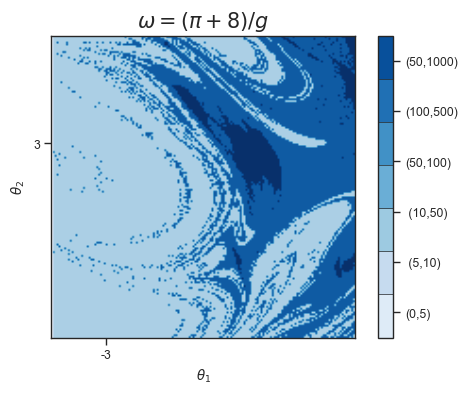

In [219]:
#Aquí viene lo intenso de graficar
rangos_lista =  [(0,5) , (5,10), (10,50),(50,100), (100,500),(50,1000)]

#tamaño de la figura
plt.figure(figsize=(1000,1000))
fig, ax = plt.subplots(dpi = 100)
#titulo
plt.title("$\omega= (\pi+8)/g $", size = 15)
#titulos de los ejes
ax.set_xlabel("$θ_1$")
ax.set_ylabel("$θ_2$")
#etiquetas de los ejes
labels = ['-3',"-2", '-1','0', '1','2','3']

#Posiciones de esas etiquetas, esto está muy rustico, podría modificarse
posicion_menos3 = -627*3/np.pi+627
posicion_menos2 = -627*2/np.pi+627
posicion_menos1 = -627*1/np.pi+627
posicion_0 = 627
posicion_1 = 1254-(-627*1/np.pi+627)
posicion_2 = 1254-(-627*2/np.pi+627)
posicion_3 = 1254-(-627*3/np.pi+627)
#las anexamos a un arreglo
ax.set_xticks([posicion_menos3,posicion_menos2,posicion_menos1,posicion_0, posicion_1, posicion_2, posicion_3])
#que las ponga en la gráfica
ax.set_xticklabels(labels)

#Lo mismo para las etiquetas en y
posicion_menos3_y = 1257*3/np.pi
posicion_menos2_y =1257*2/np.pi+628*1/np.pi
posicion_menos1_y =1257*1/np.pi+628*2/np.pi
posicion_0_y = 629
posicion_1_y =  629 + -1257/(2*np.pi)
posicion_2_y =  629 + -1257/np.pi
posicion_3_y = -1257*3/np.pi+1257
ax.set_yticks([posicion_menos3_y,posicion_menos2_y,posicion_menos1_y,posicion_0_y, posicion_1_y, posicion_2_y, posicion_3_y])
ax.set_yticklabels(labels)



#las etiquetas para la barra de color
rangos_etiquetas = ['(0,5)' ,' (5,10)',' (10,50)','(50,100)', '(100,500)','(50,1000)','$\mathregular{\geq 1000}$']
len_lab = len(rangos_etiquetas)
#los colores de la barra y el número de bloques en que se dividirá
cmap_colors = sns.color_palette("Blues",n_colors = len(rangos_lista)+1)
#esto es para escribir las etiquetas de la barra de color
norm = matplotlib.colors.BoundaryNorm( [i for i in range(0, len_lab+1)] , len_lab, clip=True)
len_lab = len(rangos_etiquetas)

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: rangos_etiquetas[norm(x)])
norm_bins = np.array([i for i in range(len(rangos_etiquetas))])
diff = np.ones(len_lab )
tickz = norm_bins[:] + diff / 2


barra_color = plt.cm.ScalarMappable(cmap = ListedColormap(cmap_colors), 
                                    norm = plt.Normalize(vmin =0,vmax = len(rangos_lista)))
barra_color._A=[]

diff = np.ones(len_lab )
tickz = norm_bins[:] + diff / 2
cbar = plt.colorbar(barra_color, format = fmt, ticks = tickz, drawedges= True)
for i in range(0,n):
    plt.plot(i, color=cmap(i))
#se grafican los datos
plt.imshow(datos, cmap = "Blues", Interpolation  = "bilinear")
plt.savefig("fractal_w_irracional.png")
plt.show()
#SE DEBE APLICAR INTERPOLACION? spline16, spline36, catrom,lanczos. Esta función sirve para recrear datos y así suavizar los datos
#bilinear,  quadric

<Figure size 72000x72000 with 0 Axes>

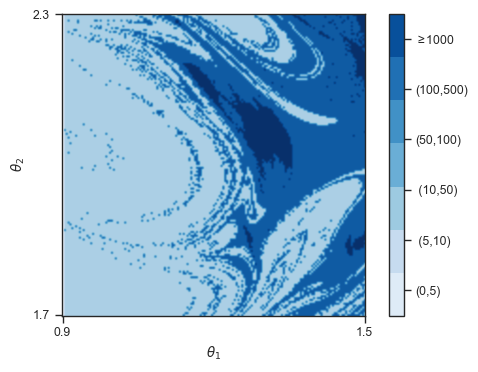

In [185]:
#Aquí viene lo intenso de graficar
rangos_lista =  [(0,5) , (5,10), (10,50),(50,100), (100,500),(50,1000)]

#tamaño de la figura
plt.figure(figsize=(1000,1000))
fig, ax = plt.subplots(dpi = 100)
#titulo
#plt.title("$\omega= (\pi+8)/g $", size = 15)
#titulos de los ejes
ax.set_xlabel("$θ_1$")
ax.set_ylabel("$θ_2$")
#etiquetas de los ejes
labels_x = ['0.9',"1.5"]

#Posiciones de esas etiquetas, esto está muy rustico, podría modificarse
posicion_1 = 0
posicion_2 = len(datos[:,1])
#las anexamos a un arreglo
ax.set_xticks([posicion_1,posicion_2])
#que las ponga en la gráfica
ax.set_xticklabels(labels_x)

#Lo mismo para las etiquetas en y
labels_y = ["2.3", "1.7"]
posicion_1_y = 0
posicion_2_y = 159#len(datos[1,:])-1
#las anexamos a un arreglo
ax.set_yticks([posicion_1_y,posicion_2_y])
ax.set_yticklabels(labels_y)



#las etiquetas para la barra de color
rangos_etiquetas = ['(0,5)' ,' (5,10)',' (10,50)','(50,100)', '(100,500)','(50,1000)','$\mathregular{\geq 1000}$']
#los colores de la barra y el número de bloques en que se dividirá
cmap_colors = sns.color_palette("Blues",n_colors = len(rangos_lista)+1)
#esto es para escribir las etiquetas de la barra de color
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: rangos_etiquetas[norm(x)])
n = len(rangos_lista)+1 
norm = matplotlib.colors.BoundaryNorm([i for i in range(0,len(rangos_lista)+1)], len(rangos_lista)+1, clip = True)
barra_color = plt.cm.ScalarMappable(cmap = ListedColormap(cmap_colors), 
                                    norm = plt.Normalize(vmin =0,vmax = len(rangos_lista)))
barra_color._A=[]
norm_bins = np.array([i for i in range(len(rangos_etiquetas))])
tickz = norm_bins[:] + diff / 2
cbar = plt.colorbar(barra_color, format = fmt, ticks = tickz)
for i in range(0,n):
    plt.plot(i, color=cmap(i))
#se grafican los datos
plt.imshow(datos, cmap = "Blues", Interpolation  = "quadric")
plt.savefig("fractal_w_irracional.png")
plt.show()
#SE DEBE APLICAR INTERPOLACION? spline16, spline36, catrom,lanczos. Esta función sirve para recrear datos y así suavizar los datos
#bilinear,  quadric